#### Task 2: Data Preprocessing

Notebook: notebooks/Data_Preprocessing.ipynb
Steps:
- Handle missing values and outliers.
- Encode categorical variables.
- Normalize/standardize numerical features.
- Split the data into training and testing sets.
- Script: scripts/data_preprocessing.py

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Load dataset
file_path = ('../Data/BostonHousing.csv') 

df= pd.read_csv(file_path)

# Display basic info
print(df.info())  
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   

###Handle Missing Values and Outliers

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

# Impute missing numerical values with the median
num_imputer = SimpleImputer(strategy="median")
df.iloc[:, :] = num_imputer.fit_transform(df)



Missing values per column:
 rm    5
dtype: int64


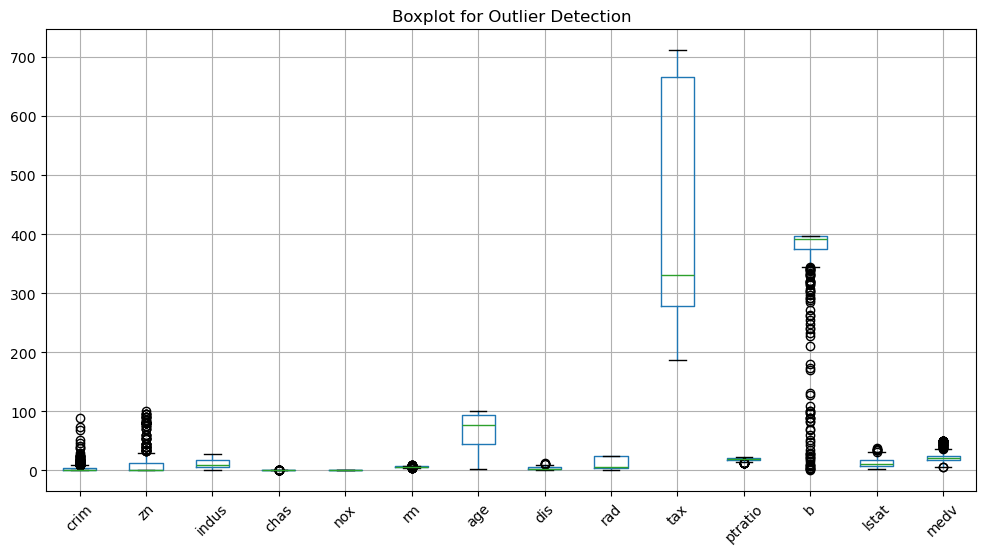

In [5]:
# Visualize outliers using boxplot
plt.figure(figsize=(12, 6))
df.boxplot(rot=45)
plt.title("Boxplot for Outlier Detection")
plt.show()


In [7]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal on selected features
outlier_columns = ["rm", "lstat", "crim","zn", "dis", "ptratio", "b", "medv"]
for col in outlier_columns:
    df = remove_outliers(df, col)


###Encode Categorical Variables

In [6]:
# Apply one-hot encoding to categorical columns

df['chas'] = df['chas'].astype('category')
print(df.dtypes)

df = pd.get_dummies(df, columns = ['chas'], prefix='chas', drop_first = True)

display(df.head)


crim        float64
zn          float64
indus       float64
chas       category
nox         float64
rm          float64
age         float64
dis         float64
rad           int64
tax           int64
ptratio     float64
b           float64
lstat       float64
medv        float64
dtype: object


<bound method NDFrame.head of         crim    zn  indus    nox     rm   age     dis  rad  tax  ptratio  \
0    0.00632  18.0   2.31  0.538  6.575  65.2  4.0900    1  296     15.3   
1    0.02731   0.0   7.07  0.469  6.421  78.9  4.9671    2  242     17.8   
2    0.02729   0.0   7.07  0.469  7.185  61.1  4.9671    2  242     17.8   
3    0.03237   0.0   2.18  0.458  6.998  45.8  6.0622    3  222     18.7   
4    0.06905   0.0   2.18  0.458  7.147  54.2  6.0622    3  222     18.7   
..       ...   ...    ...    ...    ...   ...     ...  ...  ...      ...   
501  0.06263   0.0  11.93  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527   0.0  11.93  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076   0.0  11.93  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959   0.0  11.93  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741   0.0  11.93  0.573  6.030  80.8  2.5050    1  273     21.0   

          b  lstat  medv  chas_1  
0    396.90   4.98  24

###Normalize/Standardize Numerical Features

In [9]:
#Standardization (Recommended for Linear Regression)
scaler = StandardScaler()
# Define features (X) and target variable (y)
X = df.drop('medv', axis=1)
y = df['medv']
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
display(X_scaled)



,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,chas_1
0,-0.419782,0.284830,-1.287909,-0.144217,0.415455,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,-0.272599
1,-0.417339,-0.487722,-0.593381,-0.740262,0.195904,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.272599
2,-0.417342,-0.487722,-0.593381,-0.740262,1.285105,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,-0.272599
3,-0.416750,-0.487722,-1.306878,-0.835284,1.018507,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,-0.272599
4,-0.412482,-0.487722,-1.306878,-0.835284,1.230930,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,-0.272599
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,0.158124,0.441116,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.272599
502,-0.415249,-0.487722,0.115738,0.158124,-0.233219,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.272599
503,-0.413447,-0.487722,0.115738,0.158124,0.987143,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,-0.272599
504,-0.407764,-0.487722,0.115738,0.158124,0.727673,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.272599


###Split Data into Training & Testing Sets

In [10]:

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print dataset shapes
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (404, 13), Test set: (102, 13)


In [ ]:
# Save processed datasets for model training
X_train.to_csv("../data/X_train.csv", index=False)
X_test.to_csv("../data/X_test.csv", index=False)
y_train.to_csv("../data/y_train.csv", index=False)
y_test.to_csv("../data/y_test.csv", index=False)



In [11]:
# Save processed datasets 
X_scaled.to_csv('../data/X_scaled.csv', index=False)